<a href="https://colab.research.google.com/github/ememdeee/Python-Artificial-Intelligence-Stuff/blob/main/Data_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


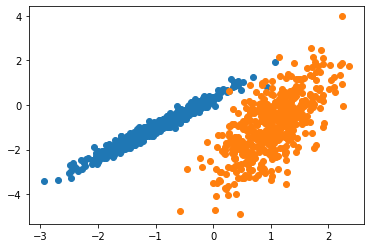

In [ ]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
 
# show the plot
pyplot.show()

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Mengimpor dataset
dataset = pd.read_csv('kkproyekmmd.csv')
X = dataset.iloc[:, [19,20]].values

In [ ]:
X

array([[ 5850000,        2],
       [ 6000000,        2],
       [ 5700000,        2],
       ...,
       [ 6970959,        2],
       [13500000,        3],
       [ 5600000,        2]])

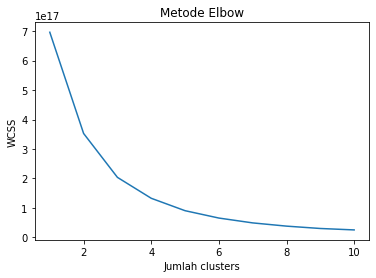

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters pelanggan')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('kkproyekmmd.csv')
data.head()

,sub_area,school_education_centers_raion,healthcare_centers_raion,sport_objects_raion,additional_education_raion,shopping_centers_raion,office_raion,church_count_3000,mosque_count_3000,market_count_3000,metro_km_walk,kindergarten_km,school_km,big_market_km,fitness_km,swim_pool_km,stadium_km,basketball_km,office_km,price_doc,Kelas
0,Bibirevo,5,1,7,3,16,1,4,0,1,1.131260,0.145700,0.177975,10.814172,0.485841,3.065047,8.148591,3.516513,0.637189,5850000,2
1,Nagatinskij Zaton,8,1,6,1,3,0,7,0,1,0.635053,0.147754,0.273345,6.910568,0.668364,2.000154,6.127073,1.161579,0.688796,6000000,2
2,Tekstil'shhiki,7,1,5,1,0,1,11,0,6,1.445960,0.049102,0.158072,5.752368,0.733101,1.239304,0.767569,1.952771,1.543049,5700000,2
3,Mitino,10,1,17,6,11,4,2,0,3,0.963802,0.179441,0.236455,27.892717,0.623484,1.950317,7.385521,4.923843,0.934273,13100000,3
4,Basmannoe,9,4,25,2,10,93,121,1,5,0.688859,0.247901,0.376838,9.155057,0.220288,2.544696,3.610754,0.307915,0.077901,16331452,3


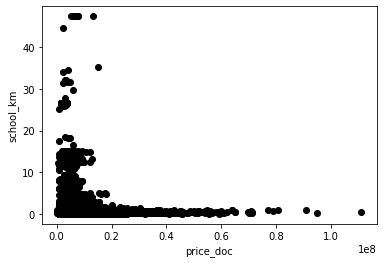

In [ ]:
X = data[["price_doc","school_km"]]
#Visualise data points
plt.scatter(X["price_doc"],X["school_km"],c='black')
plt.xlabel('price_doc')
plt.ylabel('school_km')
plt.show()

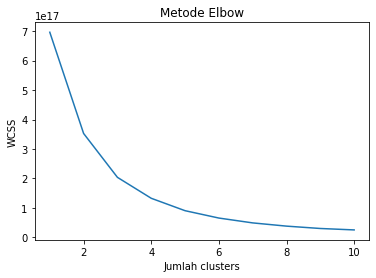

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

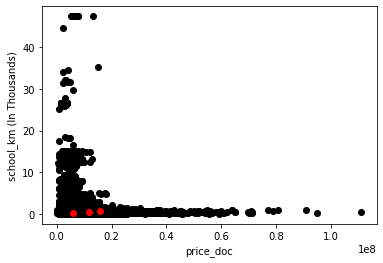

In [ ]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["price_doc"],X["school_km"],c='black')
plt.scatter(Centroids["price_doc"],Centroids["school_km"],c='red')
plt.xlabel('price_doc')
plt.ylabel('school_km (In Thousands)')
plt.show()

In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["price_doc"]-row_d["price_doc"])**2
            d2=(row_c["school_km"]-row_d["school_km"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["school_km","price_doc"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['school_km'] - Centroids['school_km']).sum() + (Centroids_new['price_doc'] - Centroids['price_doc']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["school_km","price_doc"]]

2280433.836241866
2028186.0590541076
1875980.8278006713
1747286.8111779909
1360991.2309451941
997352.8790903236
652660.2986072968
518166.4708872674
493854.9651525692
373573.5333579143
274758.5222592891
84363.75202211099
105381.1407863183
77106.77805407978
49996.02539806693
195332.8960002353
349350.6802725215
280140.3990600311
209360.90268591454
168074.5817048727
61291.3637061996
312261.9653078336
178865.90810340285
199986.4137025169
164716.48709779943
113645.0443441055
36880.44282149828
316414.74550586165
132273.57918772864
69438.84724776034
4836.995367680338
35487.90961740915
691.7838110173808
66495.47789450688
111736.61049966823
5663.238468295711
707.8891135565941
0.0


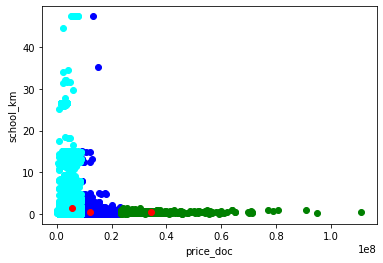

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["price_doc"],data["school_km"],c=color[k])
plt.scatter(Centroids["price_doc"],Centroids["school_km"],c='red')
plt.xlabel('price_doc')
plt.ylabel('school_km')
plt.show()

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
x1=10*np.random.rand(100,2)

In [ ]:
x1.shape

(100, 2)